In [226]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd
import csv

%matplotlib inline

In [227]:
def lorentzian_dip(frequencies, centre, FWHM, height, amplitude):
    return -amplitude*(1/(1 + ((frequencies - centre)/(FWHM / 2))**2)) + height

In [326]:
def lorentzian(frequencies, centre, FWHM, height, amplitude):
    return amplitude*(1/(1 + ((frequencies - centre)/(FWHM / 2))**2)) + height

In [228]:
def double_lorentzian_dip(frequencies, height, centre_1, FWHM_1, amplitude_1, centre_2, FWHM_2, amplitude_2):
    return -amplitude_1*(1/(1 + ((frequencies - centre_1)/(FWHM_1 / 2))**2)) -amplitude_2*(1/(1 + ((frequencies - centre_2)/(FWHM_2 / 2))**2)) + height

In [229]:
def four_lorentzian_dip(frequencies, height, centre_1, FWHM_1, amplitude_1, centre_2, FWHM_2, amplitude_2, centre_3, FWHM_3, amplitude_3, centre_4, FWHM_4, amplitude_4):
    return -amplitude_1*(1/(1 + ((frequencies - centre_1)/(FWHM_1 / 2))**2)) - amplitude_2*(1/(1 + ((frequencies - centre_2)/(FWHM_2 / 2))**2)) - amplitude_3*(1/(1 + ((frequencies - centre_3)/(FWHM_3 / 2))**2)) - amplitude_4*(1/(1 + ((frequencies - centre_4)/(FWHM_4 / 2))**2)) + height

In [242]:
counts = np.array([8278888.2, 8272361.200000001, 8268471.0, 8281403.2, 8276204.6, 8288644.4, 8284270.200000001, 8271864.0, 8264623.800000001, 8283975.800000001, 8275700.000000002, 8284874.200000001, 8272307.4, 8306470.6, 8267084.200000001, 8279127.800000001, 8288547.6000000015, 8271475.2, 8282965.6, 8271043.4, 8289841.800000001, 8268266.800000001, 8274199.600000001, 8278836.0, 8273850.200000001, 8281962.4, 8258325.800000001, 8243851.2, 8235763.000000002, 8225672.4, 8239436.4, 8218678.200000001, 8177153.6000000015, 8161934.0, 8166184.800000001, 8142760.0, 8137807.4, 8112924.6000000015, 8138087.600000001, 8093450.200000001, 8082666.200000001, 8094146.800000001, 8131079.200000001, 8140156.600000001, 8133671.2, 8102504.6000000015, 8109772.4, 8099311.800000001, 8110538.400000001, 8144137.800000001, 8145867.000000001, 8167976.800000001, 8177114.800000001, 8232488.600000001, 8222628.4, 8232450.2, 8237062.6000000015, 8261200.4, 8260463.6000000015, 8281032.0, 8279756.800000001, 8271844.4, 8279696.800000001, 8279218.000000001, 8292251.199999999, 8283424.6000000015, 8282162.0, 8284927.800000001, 8281258.4, 8286292.200000001, 8288337.6000000015, 8265039.200000001, 8292870.0, 8272520.200000001, 8280163.6000000015, 8276352.200000001, 8298289.800000001, 8290838.000000001, 8283940.800000001, 8279588.0, 8285873.800000001, 8288262.800000001, 8281004.000000001, 8281078.0, 8267411.000000001, 8282590.6000000015, 8277431.4, 8280158.4, 8294594.4, 8265186.600000001, 8288522.600000001, 8274101.0, 8267820.4, 8267395.200000001, 8272569.600000001, 8273294.6000000015, 8272024.4, 8269026.2, 8309173.000000002, 8263981.4, 8281520.4])
frequencies = np.array([2.811641, 2.82, 2.82121212, 2.82242424, 2.82363636, 2.82484848, 2.82606061, 2.82727273, 2.82848485, 2.82969697, 2.83090909, 2.83212121, 2.83333333, 2.83454545, 2.83575758, 2.8369697, 2.83818182, 2.83939394, 2.84060606, 2.84181818, 2.8430303, 2.84424242, 2.84545455, 2.84666667, 2.84787879, 2.84909091, 2.85030303, 2.85151515, 2.85272727, 2.85393939, 2.85515152, 2.85636364, 2.85757576, 2.85878788, 2.86, 2.86121212, 2.86242424, 2.86363636, 2.86484848, 2.86606061, 2.86727273, 2.86848485, 2.86969697, 2.87090909, 2.87212121, 2.87333333, 2.87454545, 2.87575758, 2.8769697, 2.87818182, 2.87939394, 2.88060606, 2.88181818, 2.8830303, 2.88424242, 2.88545455, 2.88666667, 2.88787879, 2.88909091, 2.89030303, 2.89151515, 2.89272727, 2.89393939, 2.89515152, 2.89636364, 2.89757576, 2.89878788, 2.9, 2.90121212, 2.90242424, 2.90363636, 2.90484848, 2.90606061, 2.90727273, 2.90848485, 2.90969697, 2.91090909, 2.91212121, 2.91333333, 2.91454545, 2.91575758, 2.9169697, 2.91818182, 2.91939394, 2.92060606, 2.92181818, 2.9230303, 2.92424242, 2.92545455, 2.92666667, 2.92787879, 2.92909091, 2.93030303, 2.93151515, 2.93272727, 2.93393939, 2.93515152, 2.93636364, 2.93757576, 2.93878788, 2.94])

In [243]:
counts = counts/np.max(counts)

In [244]:
popt, pcov = curve_fit(four_lorentzian_dip, frequencies, counts, p0=[1, 2.86, 0.03, 0.009, 2.87, 0.03, 0.009, 2.86, 0.03, 0.009, 2.87, 0.03, 0.009])

In [245]:
names = ['height', 'centre_1', 'FWHM_1', 'amplitude_1', 'centre_2', 'FWHM_2', 'amplitude_2', 'centre_3', 'FWHM_3', 'amplitude_3', 'centre_4', 'FWHM_4', 'amplitude_4']
for x, y in zip(names, popt):
    print('{:<11}'.format(x),'=', y)

height      = 0.99708783225
centre_1    = 2.86737702979
FWHM_1      = 0.00539413161422
amplitude_1 = 0.0154216046581
centre_2    = 2.87506936788
FWHM_2      = 0.00779125241599
amplitude_2 = 0.017839932399
centre_3    = 2.86113145235
FWHM_3      = 0.00992498896533
amplitude_3 = 0.0136252283437
centre_4    = 2.88037488371
FWHM_4      = 0.00591827279393
amplitude_4 = 0.00738966823229


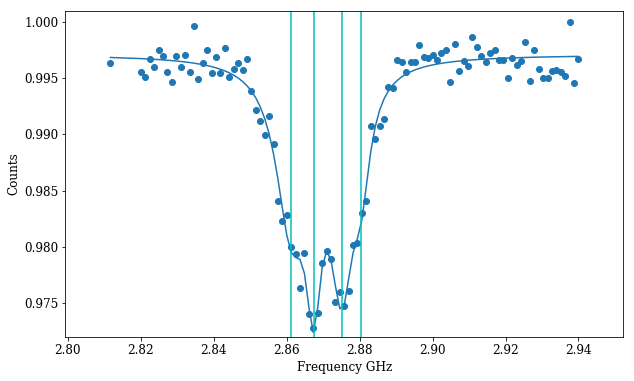

In [246]:
plt.rc('font', family='serif')
plt.rc('ytick', labelsize='12')
plt.rc('xtick', labelsize='12')


fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1)

ax.scatter(frequencies, counts)
ax.plot(frequencies, four_lorentzian_dip(frequencies, *popt))
ax.axvline(x=2.86737703, color='c')
ax.axvline(x=2.87506937, color='c')
ax.axvline(x=2.86113145, color='c')
ax.axvline(x=2.88037488, color='c')
'''
ax.axvline(x=2.86737703, ymin=0.03, ymax=0.9, color='c')
ax.axvline(x=2.87506937, ymin=0.09, ymax=0.9, color='c')
ax.axvline(x=2.86113145, ymin=0.26, ymax=0.9, color='c')
ax.axvline(x=2.88037488, ymin=0.36, ymax=0.9, color='c')
'''
plt.ylim(0.972, 1.001)
ax.set_ylabel('Counts', fontsize=12)
ax.set_xlabel('Frequency GHz', fontsize=12)

[  2.86975054e+00   2.24358602e-02   8.29663072e+06   2.07278132e+05]


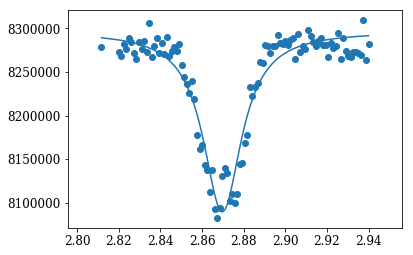

In [168]:
popt, pcov = curve_fit(lorentzian_dip, frequencies, counts, p0=[2.87,  0.001, 1000, 950000])
print(popt)
plt.scatter(frequencies, counts)
plt.plot(frequencies, lorentzian_dip(frequencies, *popt))

In [155]:
counts = np.array([8306010.800000001, 8296079.800000001, 8284542.400000001, 8305180.600000001, 8321384.200000001, 8281463.4, 8317885.600000001, 8321447.000000001, 8308257.800000001, 8318558.000000002, 8281627.4, 8289436.200000001, 8323745.4, 8299670.4, 8317346.4, 8336941.800000001, 8341329.4, 8305727.000000001, 8301250.4, 8331216.6, 8285938.4, 8290181.199999999, 8275204.4, 8295976.4, 8301870.800000001, 8295213.0, 8317388.4, 8300969.4, 8283035.4, 8272453.4, 8280177.800000001, 8275736.199999999, 8285413.0, 8253224.4, 8277549.600000001, 8279790.8, 8273873.600000001, 8280894.6, 8249496.4, 8267229.4, 8289775.200000001, 8263894.000000001, 8257889.6, 8250294.0, 8226222.4, 8227222.600000001, 8202901.4, 8246466.6, 8228710.800000001, 8158600.200000001, 8192110.800000001, 8153214.200000001, 8138856.000000001, 8138523.200000001, 8127515.800000001, 8133187.200000001, 8129525.200000001, 8107511.000000001, 8081802.6, 8074366.2, 8087489.2, 8079648.800000001, 8097466.4, 8118121.800000001, 8135723.4, 8137717.200000001, 8126814.200000001, 8120512.200000001, 8117830.0, 8111445.4, 8114563.000000001, 8139668.800000001, 8164538.2, 8157255.600000001, 8159601.4, 8144094.4, 8197632.6, 8232497.200000001, 8240281.0, 8207218.6, 8203642.6000000015, 8240835.4, 8278013.600000001, 8277303.800000001, 8240256.000000001, 8267157.0, 8274102.0, 8323315.0, 8310096.6000000015, 8326091.4, 8305966.400000001, 8317707.800000001, 8341108.2, 8299020.0, 8315601.4, 8313235.200000001, 8299961.600000001, 8302075.200000001, 8326558.0, 8324785.6, 8303452.6, 8355755.600000001, 8321027.800000001, 8325481.400000001, 8339508.600000001, 8343673.600000001, 8310814.0, 8297610.000000001, 8327913.0, 8318691.200000001, 8323407.4, 8346874.2, 8311628.6, 8345444.800000001, 8352543.0, 8328429.6000000015, 8327118.6, 8337243.0, 8371956.0, 8370191.800000001, 8332389.6000000015, 8350667.0, 8358231.000000002, 8366032.4, 8341418.200000001, 8339636.4, 8350173.4, 8364086.000000001, 8371048.000000001, 8378536.0, 8365732.2, 8349017.4, 8338558.800000001, 8333732.4, 8322577.6, 8368315.600000001, 8368236.6, 8380010.400000001, 8374887.4, 8394950.200000001, 8389125.2, 8407205.6, 8365169.0, 8357961.600000001, 8379093.600000001, 8347911.4, 8354723.800000001, 8356507.800000001, 8369449.0, 8364524.6000000015, 8335657.4])
frequencies = np.array([2.811641, 2.82, 2.82080537, 2.82161074, 2.82241611, 2.82322148, 2.82402685, 2.82483221, 2.82563758, 2.82644295, 2.82724832, 2.82805369, 2.82885906, 2.82966443, 2.8304698, 2.83127517, 2.83208054, 2.83288591, 2.83369128, 2.83449664, 2.83530201, 2.83610738, 2.83691275, 2.83771812, 2.83852349, 2.83932886, 2.84013423, 2.8409396, 2.84174497, 2.84255034, 2.8433557, 2.84416107, 2.84496644, 2.84577181, 2.84657718, 2.84738255, 2.84818792, 2.84899329, 2.84979866, 2.85060403, 2.8514094, 2.85221477, 2.85302013, 2.8538255, 2.85463087, 2.85543624, 2.85624161, 2.85704698, 2.85785235, 2.85865772, 2.85946309, 2.86026846, 2.86107383, 2.86187919, 2.86268456, 2.86348993, 2.8642953, 2.86510067, 2.86590604, 2.86671141, 2.86751678, 2.86832215, 2.86912752, 2.86993289, 2.87073826, 2.87154362, 2.87234899, 2.87315436, 2.87395973, 2.8747651, 2.87557047, 2.87637584, 2.87718121, 2.87798658, 2.87879195, 2.87959732, 2.88040268, 2.88120805, 2.88201342, 2.88281879, 2.88362416, 2.88442953, 2.8852349, 2.88604027, 2.88684564, 2.88765101, 2.88845638, 2.88926174, 2.89006711, 2.89087248, 2.89167785, 2.89248322, 2.89328859, 2.89409396, 2.89489933, 2.8957047, 2.89651007, 2.89731544, 2.89812081, 2.89892617, 2.89973154, 2.90053691, 2.90134228, 2.90214765, 2.90295302, 2.90375839, 2.90456376, 2.90536913, 2.9061745, 2.90697987, 2.90778523, 2.9085906, 2.90939597, 2.91020134, 2.91100671, 2.91181208, 2.91261745, 2.91342282, 2.91422819, 2.91503356, 2.91583893, 2.9166443, 2.91744966, 2.91825503, 2.9190604, 2.91986577, 2.92067114, 2.92147651, 2.92228188, 2.92308725, 2.92389262, 2.92469799, 2.92550336, 2.92630872, 2.92711409, 2.92791946, 2.92872483, 2.9295302, 2.93033557, 2.93114094, 2.93194631, 2.93275168, 2.93355705, 2.93436242, 2.93516779, 2.93597315, 2.93677852, 2.93758389, 2.93838926, 2.93919463, 2.94])

[  8.28855493e+06   2.86523197e+00   1.43107609e-02   1.67052801e+05
   2.87650753e+00   9.74583248e-03   1.36947341e+05]


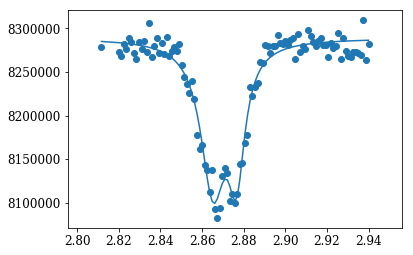

In [169]:
popt, pcov = curve_fit(double_lorentzian_dip, frequencies, counts, p0=[9e5, 2.86, 0.03, 2e5, 2.88, 0.03, 2e5])
print(popt)
plt.scatter(frequencies, counts)
plt.plot(frequencies, double_lorentzian_dip(frequencies, *popt))

In [156]:
np.max(counts) -np.min(counts)

332839.39999999944

In [170]:
counts = counts/np.max(counts)

[  2.86853001e+00   2.84913970e-02   8.36254411e+06   2.68754379e+05]


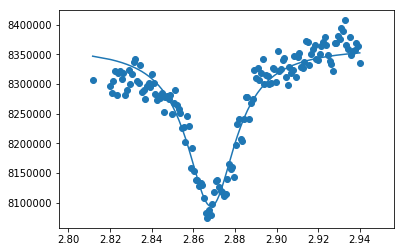

In [147]:
popt, pcov = curve_fit(lorentzian_dip, frequencies, counts, p0=[2.87,  0.001, 1000, 950000])
print(popt)
plt.scatter(frequencies, counts)
plt.plot(frequencies, lorentzian_dip(frequencies, *popt))

In [171]:
counts

array([ 0.99635526,  0.99556974,  0.99510156,  0.99665793,  0.99603229,
        0.99752941,  0.99700297,  0.9955099 ,  0.99463855,  0.99696754,
        0.99597156,  0.99707567,  0.99556326,  0.99967477,  0.99493466,
        0.99638409,  0.99751776,  0.99546311,  0.99684597,  0.99541114,
        0.99767351,  0.99507698,  0.99579099,  0.99634897,  0.99574894,
        0.99672523,  0.99388059,  0.99213859,  0.99116519,  0.98995079,
        0.99160728,  0.98910905,  0.98411161,  0.98227995,  0.98279152,
        0.97997238,  0.97937634,  0.97638172,  0.97941006,  0.97403799,
        0.97274015,  0.97412183,  0.9785666 ,  0.97965906,  0.97887855,
        0.97512768,  0.97600235,  0.97474343,  0.97609454,  0.98013819,
        0.9803463 ,  0.98300719,  0.98410694,  0.99077112,  0.98958445,
        0.99076649,  0.99132159,  0.99422655,  0.99413788,  0.99661326,
        0.99645979,  0.99550754,  0.99645257,  0.99639495,  0.99796348,
        0.99690121,  0.99674926,  0.99708212,  0.99664051,  0.99

[  8.37772910e+06   2.80888088e+00   5.73830872e-02   6.16847440e+04
   2.86928492e+00   2.78028445e-02   2.74886790e+05]


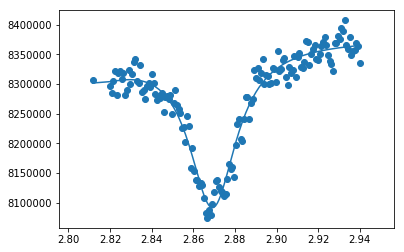

In [151]:
popt, pcov = curve_fit(double_lorentzian_dip, frequencies, counts, p0=[8.28e+06,   2.86e+00,   1.13e-02,   1.97e+05, 2.87e+00, 9.74e-03, 1.96e+05])
print(popt)
plt.scatter(frequencies, counts)
plt.plot(frequencies, double_lorentzian_dip(frequencies, *popt))

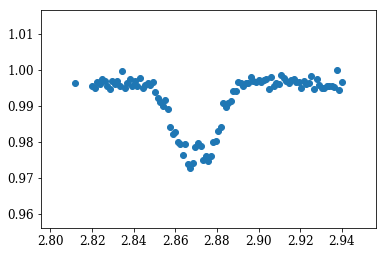

In [172]:
plt.scatter(frequencies, counts)

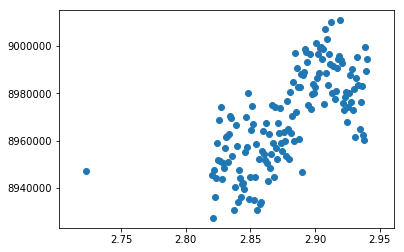

In [152]:
counts = np.array([8947120.600000001, 8945615.6, 8927381.200000001, 8947434.8, 8936336.0, 8944060.8, 8959137.0, 8952016.200000001, 8968891.0, 8951503.600000001, 8974365.2, 8943812.4, 8950451.0, 8948488.600000001, 8957096.600000001, 8961423.4, 8961946.4, 8951054.4, 8962767.200000001, 8970406.8, 8969492.8, 8953356.600000001, 8930776.0, 8940517.2, 8966621.0, 8957541.2, 8933915.2, 8947747.600000001, 8944272.0, 8935998.200000001, 8941756.6, 8942088.200000001, 8939695.200000001, 8955189.8, 8970072.0, 8957134.0, 8980291.600000001, 8935408.4, 8944679.2, 8964360.8, 8974427.200000001, 8966875.200000001, 8935055.6, 8944481.8, 8958624.8, 8930645.8, 8952390.600000001, 8933437.600000001, 8933905.4, 8955655.0, 8964182.600000001, 8954458.4, 8951710.4, 8967301.4, 8950351.0, 8943039.4, 8962745.2, 8948323.8, 8954200.8, 8975109.4, 8959144.4, 8944752.600000001, 8974348.0, 8957060.0, 8952291.200000001, 8967587.8, 8963047.8, 8973799.4, 8958826.600000001, 8955736.6, 8963770.8, 8959704.0, 8953426.8, 8976559.200000001, 8964730.2, 8952161.0, 8980393.600000001, 8963021.2, 8970379.8, 8984872.200000001, 8960014.8, 8997042.8, 8972131.200000001, 8990609.0, 8982824.4, 8960862.6, 8982824.000000002, 8988221.0, 8946933.8, 8987876.0, 8988828.8, 8998596.8, 8997504.8, 8993014.200000001, 8975067.4, 8996480.2, 8973414.2, 8979755.4, 8983819.4, 8980151.400000002, 8982834.200000001, 9001179.4, 8986397.2, 8996744.4, 8988675.8, 8999027.200000001, 8999678.4, 8994410.4, 8998761.600000001, 8975452.4, 9006961.200000001, 8988429.8, 9002786.200000001, 8983387.2, 8996369.600000001, 8992443.6, 9010212.600000001, 8980112.600000001, 8991566.0, 8977728.000000002, 8980986.8, 8990700.0, 8994281.4, 8995723.600000001, 9010810.8, 8994040.600000001, 8992678.0, 8975855.0, 8973105.600000001, 8978302.600000001, 8980688.8, 8968062.2, 8974246.4, 8980018.4, 8987701.0, 8976344.000000002, 8990312.8, 8973016.200000001, 8981853.8, 8961519.6, 8986548.4, 8995170.6, 8983316.4, 8964829.4, 8976513.0, 8983019.8, 8962255.4, 8960421.200000001, 8999400.0, 8989280.2, 8994300.2])
frequencies = np.array([2.722547, 2.82, 2.82080537, 2.82161074, 2.82241611, 2.82322148, 2.82402685, 2.82483221, 2.82563758, 2.82644295, 2.82724832, 2.82805369, 2.82885906, 2.82966443, 2.8304698, 2.83127517, 2.83208054, 2.83288591, 2.83369128, 2.83449664, 2.83530201, 2.83610738, 2.83691275, 2.83771812, 2.83852349, 2.83932886, 2.84013423, 2.8409396, 2.84174497, 2.84255034, 2.8433557, 2.84416107, 2.84496644, 2.84577181, 2.84657718, 2.84738255, 2.84818792, 2.84899329, 2.84979866, 2.85060403, 2.8514094, 2.85221477, 2.85302013, 2.8538255, 2.85463087, 2.85543624, 2.85624161, 2.85704698, 2.85785235, 2.85865772, 2.85946309, 2.86026846, 2.86107383, 2.86187919, 2.86268456, 2.86348993, 2.8642953, 2.86510067, 2.86590604, 2.86671141, 2.86751678, 2.86832215, 2.86912752, 2.86993289, 2.87073826, 2.87154362, 2.87234899, 2.87315436, 2.87395973, 2.8747651, 2.87557047, 2.87637584, 2.87718121, 2.87798658, 2.87879195, 2.87959732, 2.88040268, 2.88120805, 2.88201342, 2.88281879, 2.88362416, 2.88442953, 2.8852349, 2.88604027, 2.88684564, 2.88765101, 2.88845638, 2.88926174, 2.89006711, 2.89087248, 2.89167785, 2.89248322, 2.89328859, 2.89409396, 2.89489933, 2.8957047, 2.89651007, 2.89731544, 2.89812081, 2.89892617, 2.89973154, 2.90053691, 2.90134228, 2.90214765, 2.90295302, 2.90375839, 2.90456376, 2.90536913, 2.9061745, 2.90697987, 2.90778523, 2.9085906, 2.90939597, 2.91020134, 2.91100671, 2.91181208, 2.91261745, 2.91342282, 2.91422819, 2.91503356, 2.91583893, 2.9166443, 2.91744966, 2.91825503, 2.9190604, 2.91986577, 2.92067114, 2.92147651, 2.92228188, 2.92308725, 2.92389262, 2.92469799, 2.92550336, 2.92630872, 2.92711409, 2.92791946, 2.92872483, 2.9295302, 2.93033557, 2.93114094, 2.93194631, 2.93275168, 2.93355705, 2.93436242, 2.93516779, 2.93597315, 2.93677852, 2.93758389, 2.93838926, 2.93919463, 2.94])
plt.scatter(frequencies, counts)

In [154]:
np.max(counts) -np.min(counts)

83429.599999999627

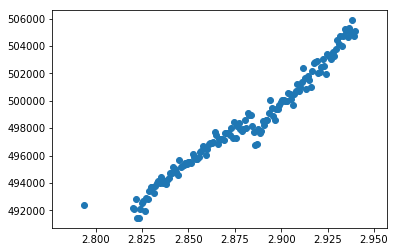

In [3]:
#Background drift in laser illumination
counts = np.array([492366.2, 492150.4, 492070.0, 492816.4, 491469.2, 491448.0, 492098.80000000005, 492511.2, 492702.4, 491940.0, 492920.80000000005, 492838.60000000003, 493440.2, 493710.2, 493731.2, 493259.80000000005, 493741.4, 493978.60000000003, 494111.2, 493986.80000000005, 494406.2, 493985.80000000005, 494133.4, 493909.60000000003, 494203.80000000005, 494358.2, 494736.80000000005, 494717.80000000005, 495132.0, 495008.80000000005, 494823.0, 494544.4, 495651.60000000003, 495148.60000000003, 495255.0, 495343.60000000003, 495421.2, 495419.60000000003, 495514.4, 495563.0, 495453.2, 496128.80000000005, 495863.4, 495763.2, 495713.0, 495921.80000000005, 496283.0, 496297.4, 496716.4, 496556.60000000003, 496068.60000000003, 496473.2, 496855.60000000003, 496917.60000000003, 496927.60000000003, 496965.60000000003, 497714.0, 497535.0, 496832.60000000003, 497219.80000000005, 497232.80000000005, 497205.0, 497099.2, 497658.0, 497615.60000000003, 497637.2, 497519.80000000005, 497982.80000000005, 497286.80000000005, 498416.60000000003, 497251.80000000005, 498124.0, 498377.4, 497936.4, 497812.60000000003, 497903.4, 498614.2, 497993.2, 499079.0, 498941.2, 498924.0, 498163.80000000005, 497723.2, 496742.4, 496845.2, 497913.80000000005, 497633.0, 497778.0, 498487.80000000005, 498228.2, 498580.4, 498609.80000000005, 499106.60000000003, 500022.2, 499449.2, 498860.60000000003, 498605.0, 499416.4, 499403.80000000005, 499717.0, 499941.0, 500037.60000000003, 500082.60000000003, 499964.60000000003, 499981.60000000003, 500540.80000000005, 500527.2, 500160.2, 499725.80000000005, 500518.2, 500729.2, 501231.0, 500743.80000000005, 500970.80000000005, 501390.60000000003, 502388.0, 501640.60000000003, 500829.0, 501805.80000000005, 501535.0, 501016.2, 502202.0, 502744.80000000005, 502832.60000000003, 502871.80000000005, 502003.60000000003, 502130.80000000005, 502480.80000000005, 503038.60000000003, 502515.4, 501932.4, 503395.2, 503252.2, 503196.0, 503064.2, 503582.4, 503274.0, 503775.2, 504417.80000000005, 504160.60000000003, 504733.4, 504025.0, 504742.0, 505213.4, 505079.60000000003, 504664.4, 505281.80000000005, 505000.80000000005, 505877.2, 504708.0, 505120.80000000005])
frequencies = np.array([2.793883, 2.82, 2.82080537, 2.82161074, 2.82241611, 2.82322148, 2.82402685, 2.82483221, 2.82563758, 2.82644295, 2.82724832, 2.82805369, 2.82885906, 2.82966443, 2.8304698, 2.83127517, 2.83208054, 2.83288591, 2.83369128, 2.83449664, 2.83530201, 2.83610738, 2.83691275, 2.83771812, 2.83852349, 2.83932886, 2.84013423, 2.8409396, 2.84174497, 2.84255034, 2.8433557, 2.84416107, 2.84496644, 2.84577181, 2.84657718, 2.84738255, 2.84818792, 2.84899329, 2.84979866, 2.85060403, 2.8514094, 2.85221477, 2.85302013, 2.8538255, 2.85463087, 2.85543624, 2.85624161, 2.85704698, 2.85785235, 2.85865772, 2.85946309, 2.86026846, 2.86107383, 2.86187919, 2.86268456, 2.86348993, 2.8642953, 2.86510067, 2.86590604, 2.86671141, 2.86751678, 2.86832215, 2.86912752, 2.86993289, 2.87073826, 2.87154362, 2.87234899, 2.87315436, 2.87395973, 2.8747651, 2.87557047, 2.87637584, 2.87718121, 2.87798658, 2.87879195, 2.87959732, 2.88040268, 2.88120805, 2.88201342, 2.88281879, 2.88362416, 2.88442953, 2.8852349, 2.88604027, 2.88684564, 2.88765101, 2.88845638, 2.88926174, 2.89006711, 2.89087248, 2.89167785, 2.89248322, 2.89328859, 2.89409396, 2.89489933, 2.8957047, 2.89651007, 2.89731544, 2.89812081, 2.89892617, 2.89973154, 2.90053691, 2.90134228, 2.90214765, 2.90295302, 2.90375839, 2.90456376, 2.90536913, 2.9061745, 2.90697987, 2.90778523, 2.9085906, 2.90939597, 2.91020134, 2.91100671, 2.91181208, 2.91261745, 2.91342282, 2.91422819, 2.91503356, 2.91583893, 2.9166443, 2.91744966, 2.91825503, 2.9190604, 2.91986577, 2.92067114, 2.92147651, 2.92228188, 2.92308725, 2.92389262, 2.92469799, 2.92550336, 2.92630872, 2.92711409, 2.92791946, 2.92872483, 2.9295302, 2.93033557, 2.93114094, 2.93194631, 2.93275168, 2.93355705, 2.93436242, 2.93516779, 2.93597315, 2.93677852, 2.93758389, 2.93838926, 2.93919463, 2.94])
plt.scatter(frequencies, counts)

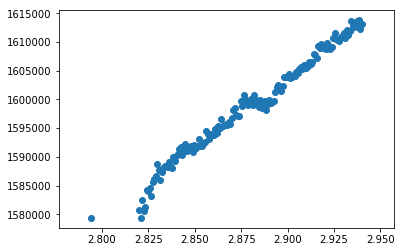

In [5]:
#Drift with microwaves being delivered
counts = np.array([1579421.2, 1580813.0, 1579365.2, 1582479.4, 1580642.6, 1581349.6, 1584274.0, 1583963.4, 1584542.8, 1583144.6, 1585545.8, 1586090.4000000001, 1586582.2000000002, 1588743.8, 1587714.8, 1585999.6, 1587280.4, 1588018.4, 1588379.4000000001, 1588429.6, 1588201.2, 1589107.8, 1588301.0, 1588073.8, 1590007.8, 1589354.6, 1590144.6, 1590476.8000000003, 1591358.4, 1591654.0, 1590280.0, 1590929.2000000002, 1592295.8, 1591026.0, 1591369.0, 1591200.0, 1591806.2000000002, 1590842.0, 1592027.4, 1591543.0, 1591906.0, 1593085.2000000002, 1591920.0, 1591936.6, 1592179.0, 1592600.0, 1594420.6, 1593976.0, 1593034.8, 1594001.4, 1593875.2000000002, 1593735.0, 1594865.0, 1594194.0, 1595304.6, 1595060.8000000003, 1596628.8, 1595420.2000000002, 1595496.8, 1595770.8, 1595615.0, 1596007.4, 1595685.8000000003, 1596712.8, 1598088.0, 1598453.0, 1597239.0, 1597092.2000000002, 1597065.0, 1599669.8000000003, 1598873.4000000001, 1600799.7999999998, 1599985.4000000001, 1599260.0, 1599085.2000000002, 1599275.6, 1600072.2, 1598945.6, 1600840.8, 1599884.0, 1599716.0, 1598603.8, 1599846.6, 1598550.4, 1599254.4, 1599797.4, 1598203.4000000001, 1599115.7999999998, 1599938.0, 1599311.6, 1599588.4000000001, 1599765.6, 1601270.2000000002, 1602112.6, 1602511.2000000002, 1602139.4000000001, 1601373.4000000001, 1602341.8, 1603942.6, 1603948.4, 1603954.7999999998, 1604495.0, 1603727.8000000003, 1603900.6, 1604124.2000000002, 1604105.8, 1604713.4000000001, 1604524.2000000002, 1605245.4, 1605566.8000000003, 1605371.7999999998, 1605943.4, 1605467.0, 1605424.2000000002, 1605797.2000000002, 1606483.6, 1606168.0, 1606427.4, 1607812.6, 1607682.8000000003, 1607284.8, 1609228.2000000002, 1608901.8000000003, 1609582.6, 1608957.2000000002, 1609052.2000000002, 1608711.4, 1609770.4, 1609369.0, 1608782.0, 1609177.2000000002, 1610741.6, 1611479.6, 1610576.2000000002, 1610309.2, 1610178.6, 1610883.6, 1610981.2, 1611476.0, 1610739.4, 1612143.4000000001, 1611136.4, 1611971.8000000003, 1613642.4, 1612777.4000000001, 1612633.2000000002, 1613156.8, 1613585.8, 1613772.2000000002, 1612249.4000000001, 1613095.6])
frequencies = np.array([2.793883, 2.82, 2.82080537, 2.82161074, 2.82241611, 2.82322148, 2.82402685, 2.82483221, 2.82563758, 2.82644295, 2.82724832, 2.82805369, 2.82885906, 2.82966443, 2.8304698, 2.83127517, 2.83208054, 2.83288591, 2.83369128, 2.83449664, 2.83530201, 2.83610738, 2.83691275, 2.83771812, 2.83852349, 2.83932886, 2.84013423, 2.8409396, 2.84174497, 2.84255034, 2.8433557, 2.84416107, 2.84496644, 2.84577181, 2.84657718, 2.84738255, 2.84818792, 2.84899329, 2.84979866, 2.85060403, 2.8514094, 2.85221477, 2.85302013, 2.8538255, 2.85463087, 2.85543624, 2.85624161, 2.85704698, 2.85785235, 2.85865772, 2.85946309, 2.86026846, 2.86107383, 2.86187919, 2.86268456, 2.86348993, 2.8642953, 2.86510067, 2.86590604, 2.86671141, 2.86751678, 2.86832215, 2.86912752, 2.86993289, 2.87073826, 2.87154362, 2.87234899, 2.87315436, 2.87395973, 2.8747651, 2.87557047, 2.87637584, 2.87718121, 2.87798658, 2.87879195, 2.87959732, 2.88040268, 2.88120805, 2.88201342, 2.88281879, 2.88362416, 2.88442953, 2.8852349, 2.88604027, 2.88684564, 2.88765101, 2.88845638, 2.88926174, 2.89006711, 2.89087248, 2.89167785, 2.89248322, 2.89328859, 2.89409396, 2.89489933, 2.8957047, 2.89651007, 2.89731544, 2.89812081, 2.89892617, 2.89973154, 2.90053691, 2.90134228, 2.90214765, 2.90295302, 2.90375839, 2.90456376, 2.90536913, 2.9061745, 2.90697987, 2.90778523, 2.9085906, 2.90939597, 2.91020134, 2.91100671, 2.91181208, 2.91261745, 2.91342282, 2.91422819, 2.91503356, 2.91583893, 2.9166443, 2.91744966, 2.91825503, 2.9190604, 2.91986577, 2.92067114, 2.92147651, 2.92228188, 2.92308725, 2.92389262, 2.92469799, 2.92550336, 2.92630872, 2.92711409, 2.92791946, 2.92872483, 2.9295302, 2.93033557, 2.93114094, 2.93194631, 2.93275168, 2.93355705, 2.93436242, 2.93516779, 2.93597315, 2.93677852, 2.93758389, 2.93838926, 2.93919463, 2.94])
plt.scatter(frequencies, counts)

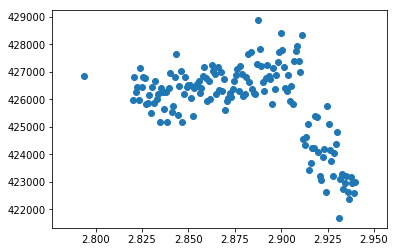

In [5]:
#Laser only, Not sure what drrift at end is, perhaps bumped mirrors
counts = np.array([426836.80000000005, 425969.60000000003, 426802.80000000005, 426279.80000000005, 426453.2, 425982.2, 427147.60000000003, 426462.0, 426801.2, 426778.60000000003, 425848.80000000005, 425882.4, 426146.2, 425514.2, 426456.4, 425850.0, 426677.0, 425999.60000000003, 426186.80000000005, 425171.0, 426400.4, 426256.80000000005, 425640.4, 426252.60000000003, 425176.0, 426420.0, 426966.4, 425550.80000000005, 425757.60000000003, 426806.2, 427642.0, 425433.0, 426500.0, 427016.60000000003, 425182.4, 426207.60000000003, 426803.80000000005, 426464.60000000003, 426524.0, 426535.80000000005, 426056.80000000005, 425389.0, 426414.0, 426470.4, 426542.60000000003, 426678.80000000005, 426229.80000000005, 426413.80000000005, 426845.0, 427190.80000000005, 426783.60000000003, 425935.2, 426683.80000000005, 426012.4, 427251.0, 427041.2, 426938.0, 426197.2, 427172.0, 426335.0, 427009.60000000003, 426288.4, 426752.4, 425625.0, 425943.0, 426032.0, 426240.80000000005, 426095.2, 426364.60000000003, 426666.80000000005, 426883.4, 427093.60000000003, 426315.0, 427219.80000000005, 426928.2, 426110.60000000003, 426206.60000000003, 426800.2, 427639.0, 426629.60000000003, 427705.4, 426361.80000000005, 426227.60000000003, 426184.80000000005, 427289.60000000003, 428877.60000000003, 427832.60000000003, 427221.60000000003, 426647.2, 426298.4, 426766.80000000005, 427248.0, 426845.60000000003, 426731.60000000003, 425844.0, 427147.60000000003, 426373.80000000005, 426890.0, 427348.2, 427708.2, 428431.0, 427809.0, 427165.2, 426415.60000000003, 426315.4, 426882.4, 425951.60000000003, 426500.60000000003, 425837.60000000003, 427387.60000000003, 427757.80000000005, 427941.80000000005, 427411.4, 427002.2, 428347.2, 424574.2, 424356.4, 424640.60000000003, 425113.80000000005, 423445.4, 423686.4, 424223.4, 424217.0, 425406.0, 425362.60000000003, 424075.80000000005, 423207.4, 423050.4, 423888.0, 424209.80000000005, 422632.2, 425771.0, 425116.2, 424164.2, 423752.60000000003, 423204.0, 424044.60000000003, 424359.80000000005, 424830.80000000005, 421688.4, 423117.80000000005, 423290.80000000005, 422728.0, 422943.2, 423216.2, 422636.2, 422391.4, 423172.2, 422949.2, 422604.60000000003, 423010.60000000003])
frequencies = np.array([2.793883, 2.82, 2.82080537, 2.82161074, 2.82241611, 2.82322148, 2.82402685, 2.82483221, 2.82563758, 2.82644295, 2.82724832, 2.82805369, 2.82885906, 2.82966443, 2.8304698, 2.83127517, 2.83208054, 2.83288591, 2.83369128, 2.83449664, 2.83530201, 2.83610738, 2.83691275, 2.83771812, 2.83852349, 2.83932886, 2.84013423, 2.8409396, 2.84174497, 2.84255034, 2.8433557, 2.84416107, 2.84496644, 2.84577181, 2.84657718, 2.84738255, 2.84818792, 2.84899329, 2.84979866, 2.85060403, 2.8514094, 2.85221477, 2.85302013, 2.8538255, 2.85463087, 2.85543624, 2.85624161, 2.85704698, 2.85785235, 2.85865772, 2.85946309, 2.86026846, 2.86107383, 2.86187919, 2.86268456, 2.86348993, 2.8642953, 2.86510067, 2.86590604, 2.86671141, 2.86751678, 2.86832215, 2.86912752, 2.86993289, 2.87073826, 2.87154362, 2.87234899, 2.87315436, 2.87395973, 2.8747651, 2.87557047, 2.87637584, 2.87718121, 2.87798658, 2.87879195, 2.87959732, 2.88040268, 2.88120805, 2.88201342, 2.88281879, 2.88362416, 2.88442953, 2.8852349, 2.88604027, 2.88684564, 2.88765101, 2.88845638, 2.88926174, 2.89006711, 2.89087248, 2.89167785, 2.89248322, 2.89328859, 2.89409396, 2.89489933, 2.8957047, 2.89651007, 2.89731544, 2.89812081, 2.89892617, 2.89973154, 2.90053691, 2.90134228, 2.90214765, 2.90295302, 2.90375839, 2.90456376, 2.90536913, 2.9061745, 2.90697987, 2.90778523, 2.9085906, 2.90939597, 2.91020134, 2.91100671, 2.91181208, 2.91261745, 2.91342282, 2.91422819, 2.91503356, 2.91583893, 2.9166443, 2.91744966, 2.91825503, 2.9190604, 2.91986577, 2.92067114, 2.92147651, 2.92228188, 2.92308725, 2.92389262, 2.92469799, 2.92550336, 2.92630872, 2.92711409, 2.92791946, 2.92872483, 2.9295302, 2.93033557, 2.93114094, 2.93194631, 2.93275168, 2.93355705, 2.93436242, 2.93516779, 2.93597315, 2.93677852, 2.93758389, 2.93838926, 2.93919463, 2.94])
plt.scatter(frequencies, counts)

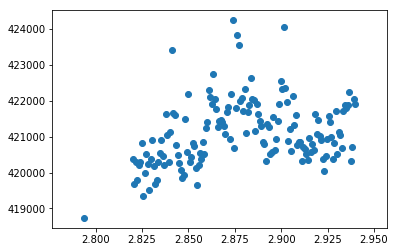

In [6]:
#cavity detuned above transition, 5 second integration time, 1 run
counts = np.array([418736.2, 420378.2, 419673.4, 420298.80000000005, 419781.0, 420207.0, 420281.0, 420826.60000000003, 419344.80000000005, 419978.0, 420515.2, 420241.2, 419521.80000000005, 420370.60000000003, 420903.80000000005, 420169.0, 419667.2, 419780.60000000003, 420296.4, 420556.80000000005, 420905.4, 420447.2, 420199.80000000005, 421629.2, 421058.0, 420293.60000000003, 421121.0, 423401.60000000003, 421646.0, 421593.2, 420769.4, 420495.0, 420275.2, 420059.0, 419847.0, 419923.2, 421478.0, 420581.0, 422180.80000000005, 420285.80000000005, 420445.80000000005, 420832.80000000005, 420728.60000000003, 420114.0, 419646.0, 420209.2, 420548.60000000003, 420368.80000000005, 420841.2, 420503.60000000003, 421248.60000000003, 421406.2, 422291.0, 422117.60000000003, 421900.80000000005, 422731.80000000005, 422046.0, 421771.4, 421273.60000000003, 421437.2, 421470.60000000003, 421421.4, 421284.2, 421061.2, 421690.2, 421818.4, 420932.60000000003, 422187.0, 424243.0, 420675.80000000005, 421812.0, 423833.4, 423558.60000000003, 421982.0, 422073.4, 421706.0, 422314.2, 421103.60000000003, 421693.0, 421891.2, 422641.80000000005, 422047.80000000005, 422009.2, 421154.60000000003, 421914.0, 421627.80000000005, 421446.80000000005, 421284.60000000003, 420839.4, 420785.60000000003, 420311.60000000003, 421362.0, 421262.60000000003, 420518.2, 420575.0, 421554.60000000003, 420619.60000000003, 420939.0, 421446.4, 421905.0, 422562.2, 422323.60000000003, 424062.60000000003, 422344.60000000003, 421951.80000000005, 420866.80000000005, 421226.2, 420611.2, 422119.80000000005, 421322.60000000003, 421613.0, 420779.60000000003, 420841.2, 420847.0, 420318.80000000005, 420712.60000000003, 420666.60000000003, 420511.4, 420353.0, 420948.80000000005, 420580.60000000003, 420794.2, 420622.2, 421643.4, 421085.80000000005, 421457.4, 421026.2, 420915.60000000003, 420387.4, 420051.80000000005, 420454.2, 420937.80000000005, 421566.60000000003, 421421.4, 420978.2, 420367.2, 420819.80000000005, 421711.0, 420511.2, 421120.2, 421055.4, 420680.80000000005, 421713.80000000005, 421875.2, 421794.2, 421881.2, 422248.2, 420318.2, 420700.0, 422059.0, 421921.0])
frequencies = np.array([2.793883, 2.82, 2.82080537, 2.82161074, 2.82241611, 2.82322148, 2.82402685, 2.82483221, 2.82563758, 2.82644295, 2.82724832, 2.82805369, 2.82885906, 2.82966443, 2.8304698, 2.83127517, 2.83208054, 2.83288591, 2.83369128, 2.83449664, 2.83530201, 2.83610738, 2.83691275, 2.83771812, 2.83852349, 2.83932886, 2.84013423, 2.8409396, 2.84174497, 2.84255034, 2.8433557, 2.84416107, 2.84496644, 2.84577181, 2.84657718, 2.84738255, 2.84818792, 2.84899329, 2.84979866, 2.85060403, 2.8514094, 2.85221477, 2.85302013, 2.8538255, 2.85463087, 2.85543624, 2.85624161, 2.85704698, 2.85785235, 2.85865772, 2.85946309, 2.86026846, 2.86107383, 2.86187919, 2.86268456, 2.86348993, 2.8642953, 2.86510067, 2.86590604, 2.86671141, 2.86751678, 2.86832215, 2.86912752, 2.86993289, 2.87073826, 2.87154362, 2.87234899, 2.87315436, 2.87395973, 2.8747651, 2.87557047, 2.87637584, 2.87718121, 2.87798658, 2.87879195, 2.87959732, 2.88040268, 2.88120805, 2.88201342, 2.88281879, 2.88362416, 2.88442953, 2.8852349, 2.88604027, 2.88684564, 2.88765101, 2.88845638, 2.88926174, 2.89006711, 2.89087248, 2.89167785, 2.89248322, 2.89328859, 2.89409396, 2.89489933, 2.8957047, 2.89651007, 2.89731544, 2.89812081, 2.89892617, 2.89973154, 2.90053691, 2.90134228, 2.90214765, 2.90295302, 2.90375839, 2.90456376, 2.90536913, 2.9061745, 2.90697987, 2.90778523, 2.9085906, 2.90939597, 2.91020134, 2.91100671, 2.91181208, 2.91261745, 2.91342282, 2.91422819, 2.91503356, 2.91583893, 2.9166443, 2.91744966, 2.91825503, 2.9190604, 2.91986577, 2.92067114, 2.92147651, 2.92228188, 2.92308725, 2.92389262, 2.92469799, 2.92550336, 2.92630872, 2.92711409, 2.92791946, 2.92872483, 2.9295302, 2.93033557, 2.93114094, 2.93194631, 2.93275168, 2.93355705, 2.93436242, 2.93516779, 2.93597315, 2.93677852, 2.93758389, 2.93838926, 2.93919463, 2.94])
plt.scatter(frequencies, counts)

0.00525239365854


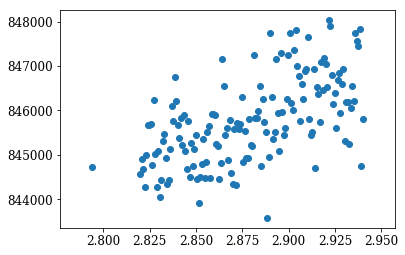

In [250]:
#cavity detuned above transition, 5 second integration time, 2 runs
counts = np.array([844717.8, 844575.0, 844898.8, 844673.8, 844269.0, 844995.2000000001, 845669.4, 845677.4000000001, 845688.6000000001, 844767.0, 846224.2000000001, 845008.2, 844276.8, 845075.8, 844056.6000000001, 844437.6000000001, 845316.0, 845473.2000000001, 844930.2000000001, 844335.0, 844436.2000000001, 845138.6000000001, 846107.2000000001, 845762.2000000001, 846760.2000000001, 846215.2000000001, 845664.2000000001, 845368.4, 845821.4, 845226.4000000001, 845894.0, 845096.4, 844677.8, 845760.2000000001, 844499.0, 845260.8, 844745.0, 845131.6000000001, 845454.8, 844448.8, 843920.0, 844503.2000000001, 844790.8, 845366.4, 844468.4, 844841.8, 845510.8, 845659.4000000001, 844483.6000000001, 845914.2000000001, 845908.8, 845889.4, 845248.8, 845204.2, 844451.2000000001, 844805.2, 847150.4000000001, 846559.4, 845443.8, 845608.2000000001, 844874.6000000001, 845778.2, 844581.8, 844334.8, 845587.8, 844320.0, 845714.0, 845577.2, 845696.8, 846296.2, 844836.0, 845539.2, 844918.4000000001, 844923.8, 845802.6000000001, 845223.2000000001, 845198.0, 847250.4, 845826.6000000001, 845832.6000000001, 845997.8, 846560.4, 844750.8, 846265.4, 845746.2, 845516.0, 843578.2000000001, 844944.6000000001, 847746.0, 846300.2, 845349.6000000001, 845519.4000000001, 847167.0, 845946.4000000001, 845095.0, 847297.0, 845956.8, 845453.8, 845610.8, 846248.0, 847252.2, 847743.8, 846167.4, 846014.2000000001, 847361.8, 847805.6000000001, 846996.4, 846766.0, 845762.6000000001, 846599.4, 846251.0, 846888.4, 846934.6000000001, 847663.2, 845799.2000000001, 845450.8, 845507.2000000001, 846936.2, 844713.2000000001, 846538.2000000001, 846361.0, 845748.8, 847081.4000000001, 846454.2, 847185.4, 847057.4, 846535.2000000001, 848032.4, 847895.4, 846796.0, 846149.6000000001, 846392.6000000001, 845615.2, 846687.0, 846850.8, 845933.4, 846597.8, 846926.0, 845318.0, 846184.2, 846187.6000000001, 845255.0, 846065.4000000001, 846543.2, 846220.4000000001, 847752.8, 847562.0, 847448.2, 847831.2000000001, 844743.6000000001, 845803.4000000001])
frequencies = np.array([2.793883, 2.82, 2.82080537, 2.82161074, 2.82241611, 2.82322148, 2.82402685, 2.82483221, 2.82563758, 2.82644295, 2.82724832, 2.82805369, 2.82885906, 2.82966443, 2.8304698, 2.83127517, 2.83208054, 2.83288591, 2.83369128, 2.83449664, 2.83530201, 2.83610738, 2.83691275, 2.83771812, 2.83852349, 2.83932886, 2.84013423, 2.8409396, 2.84174497, 2.84255034, 2.8433557, 2.84416107, 2.84496644, 2.84577181, 2.84657718, 2.84738255, 2.84818792, 2.84899329, 2.84979866, 2.85060403, 2.8514094, 2.85221477, 2.85302013, 2.8538255, 2.85463087, 2.85543624, 2.85624161, 2.85704698, 2.85785235, 2.85865772, 2.85946309, 2.86026846, 2.86107383, 2.86187919, 2.86268456, 2.86348993, 2.8642953, 2.86510067, 2.86590604, 2.86671141, 2.86751678, 2.86832215, 2.86912752, 2.86993289, 2.87073826, 2.87154362, 2.87234899, 2.87315436, 2.87395973, 2.8747651, 2.87557047, 2.87637584, 2.87718121, 2.87798658, 2.87879195, 2.87959732, 2.88040268, 2.88120805, 2.88201342, 2.88281879, 2.88362416, 2.88442953, 2.8852349, 2.88604027, 2.88684564, 2.88765101, 2.88845638, 2.88926174, 2.89006711, 2.89087248, 2.89167785, 2.89248322, 2.89328859, 2.89409396, 2.89489933, 2.8957047, 2.89651007, 2.89731544, 2.89812081, 2.89892617, 2.89973154, 2.90053691, 2.90134228, 2.90214765, 2.90295302, 2.90375839, 2.90456376, 2.90536913, 2.9061745, 2.90697987, 2.90778523, 2.9085906, 2.90939597, 2.91020134, 2.91100671, 2.91181208, 2.91261745, 2.91342282, 2.91422819, 2.91503356, 2.91583893, 2.9166443, 2.91744966, 2.91825503, 2.9190604, 2.91986577, 2.92067114, 2.92147651, 2.92228188, 2.92308725, 2.92389262, 2.92469799, 2.92550336, 2.92630872, 2.92711409, 2.92791946, 2.92872483, 2.9295302, 2.93033557, 2.93114094, 2.93194631, 2.93275168, 2.93355705, 2.93436242, 2.93516779, 2.93597315, 2.93677852, 2.93758389, 2.93838926, 2.93919463, 2.94])
plt.scatter(frequencies, counts)

print((np.max(counts) -np.min(counts))/np.max(counts))

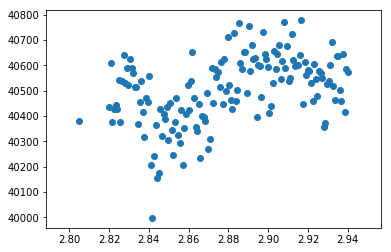

In [4]:
counts = np.array([40379.40000000001, 40437.8, 40610.0, 40374.8, 40428.4, 40442.8, 40426.600000000006, 40542.4, 40376.2, 40540.2, 40639.600000000006, 40531.8, 40587.8, 40524.0, 40625.8, 40589.0, 40569.8, 40513.4, 40514.200000000004, 40367.4, 40454.8, 40537.40000000001, 40415.200000000004, 40316.2, 40471.40000000001, 40455.2, 40558.600000000006, 40207.0, 39998.200000000004, 40244.4, 40364.200000000004, 40156.8, 40176.4, 40426.200000000004, 40320.0, 40407.4, 40390.0, 40437.600000000006, 40307.0, 40451.0, 40344.40000000001, 40247.8, 40378.200000000004, 40469.8, 40323.600000000006, 40294.8, 40425.600000000006, 40205.2, 40354.8, 40407.40000000001, 40524.600000000006, 40422.4, 40539.4, 40653.600000000006, 40472.0, 40358.0, 40339.600000000006, 40448.2, 40234.8, 40401.40000000001, 40397.8, 40382.200000000004, 40490.2, 40272.0, 40309.200000000004, 40588.2, 40452.600000000006, 40584.600000000006, 40555.0, 40575.0, 40515.0, 40613.40000000001, 40447.200000000004, 40623.600000000006, 40497.8, 40710.4, 40520.8, 40463.40000000001, 40429.600000000006, 40727.600000000006, 40459.0, 40504.0, 40765.600000000006, 40609.8, 40586.40000000001, 40654.600000000006, 40654.200000000004, 40491.8, 40754.8, 40579.600000000006, 40682.2, 40626.2, 40627.8, 40398.0, 40601.2, 40597.8, 40473.8, 40732.4, 40643.4, 40625.0, 40593.4, 40413.600000000006, 40440.8, 40529.2, 40655.40000000001, 40587.0, 40643.600000000006, 40679.200000000004, 40546.8, 40616.0, 40771.8, 40591.200000000004, 40675.2, 40537.0, 40551.2, 40723.40000000001, 40619.8, 40597.4, 40601.0, 40602.8, 40640.0, 40778.2, 40448.40000000001, 40614.200000000004, 40561.600000000006, 40583.600000000006, 40579.4, 40531.200000000004, 40457.8, 40603.600000000006, 40544.8, 40478.600000000006, 40578.600000000006, 40571.600000000006, 40550.200000000004, 40357.0, 40374.40000000001, 40526.8, 40539.2, 40601.8, 40692.40000000001, 40518.0, 40462.8, 40635.8, 40636.8, 40504.8, 40458.200000000004, 40643.8, 40417.4, 40585.0, 40572.8])
frequencies = np.array([2.804917, 2.82, 2.82080537, 2.82161074, 2.82241611, 2.82322148, 2.82402685, 2.82483221, 2.82563758, 2.82644295, 2.82724832, 2.82805369, 2.82885906, 2.82966443, 2.8304698, 2.83127517, 2.83208054, 2.83288591, 2.83369128, 2.83449664, 2.83530201, 2.83610738, 2.83691275, 2.83771812, 2.83852349, 2.83932886, 2.84013423, 2.8409396, 2.84174497, 2.84255034, 2.8433557, 2.84416107, 2.84496644, 2.84577181, 2.84657718, 2.84738255, 2.84818792, 2.84899329, 2.84979866, 2.85060403, 2.8514094, 2.85221477, 2.85302013, 2.8538255, 2.85463087, 2.85543624, 2.85624161, 2.85704698, 2.85785235, 2.85865772, 2.85946309, 2.86026846, 2.86107383, 2.86187919, 2.86268456, 2.86348993, 2.8642953, 2.86510067, 2.86590604, 2.86671141, 2.86751678, 2.86832215, 2.86912752, 2.86993289, 2.87073826, 2.87154362, 2.87234899, 2.87315436, 2.87395973, 2.8747651, 2.87557047, 2.87637584, 2.87718121, 2.87798658, 2.87879195, 2.87959732, 2.88040268, 2.88120805, 2.88201342, 2.88281879, 2.88362416, 2.88442953, 2.8852349, 2.88604027, 2.88684564, 2.88765101, 2.88845638, 2.88926174, 2.89006711, 2.89087248, 2.89167785, 2.89248322, 2.89328859, 2.89409396, 2.89489933, 2.8957047, 2.89651007, 2.89731544, 2.89812081, 2.89892617, 2.89973154, 2.90053691, 2.90134228, 2.90214765, 2.90295302, 2.90375839, 2.90456376, 2.90536913, 2.9061745, 2.90697987, 2.90778523, 2.9085906, 2.90939597, 2.91020134, 2.91100671, 2.91181208, 2.91261745, 2.91342282, 2.91422819, 2.91503356, 2.91583893, 2.9166443, 2.91744966, 2.91825503, 2.9190604, 2.91986577, 2.92067114, 2.92147651, 2.92228188, 2.92308725, 2.92389262, 2.92469799, 2.92550336, 2.92630872, 2.92711409, 2.92791946, 2.92872483, 2.9295302, 2.93033557, 2.93114094, 2.93194631, 2.93275168, 2.93355705, 2.93436242, 2.93516779, 2.93597315, 2.93677852, 2.93758389, 2.93838926, 2.93919463, 2.94])
plt.scatter(frequencies, counts)

In [472]:
counts = np.array([35893.0, 36301.0, 36304.0, 35989.0, 36283.0, 35914.0, 35855.0, 36293.0, 35834.0, 35784.0, 35698.0, 36269.0, 36039.0, 35870.0, 36235.0, 36190.0, 35946.0, 35945.0, 36264.0, 35972.0, 36158.0, 35851.0, 36167.0, 36168.0, 36115.0, 35959.0, 36276.0, 36432.0, 36301.0, 36408.0, 36322.0, 35802.0, 35760.0, 36254.0, 36282.0, 36089.0, 36253.0, 36321.0, 36104.0, 35999.0, 36192.0, 36026.0, 36254.0, 36060.0, 35870.0, 35587.0, 35523.0, 35128.0, 34989.0, 34960.0, 35275.0, 34995.0, 35031.0, 35072.0, 35234.0, 35865.0, 35629.0, 35815.0, 35733.0, 36128.0, 36216.0, 36162.0, 35885.0, 36155.0, 36065.0, 35874.0, 35909.0, 35746.0, 36568.0, 36123.0, 36208.0, 36316.0, 36443.0, 35881.0, 36139.0, 36167.0, 36262.0, 36201.0, 36336.0, 36487.0, 35947.0, 36208.0, 36340.0, 36208.0, 36401.0, 36089.0, 35650.0, 36119.0, 36129.0, 36321.0, 36401.0, 36518.0, 36265.0, 36490.0, 36203.0, 36390.0, 36215.0, 36415.0, 36094.0, 36197.0, 36088.0])
frequencies = np.array([2.81805, 2.82, 2.8210101, 2.8220202, 2.8230303, 2.8240404, 2.82505051, 2.82606061, 2.82707071, 2.82808081, 2.82909091, 2.83010101, 2.83111111, 2.83212121, 2.83313131, 2.83414141, 2.83515152, 2.83616162, 2.83717172, 2.83818182, 2.83919192, 2.84020202, 2.84121212, 2.84222222, 2.84323232, 2.84424242, 2.84525253, 2.84626263, 2.84727273, 2.84828283, 2.84929293, 2.85030303, 2.85131313, 2.85232323, 2.85333333, 2.85434343, 2.85535354, 2.85636364, 2.85737374, 2.85838384, 2.85939394, 2.86040404, 2.86141414, 2.86242424, 2.86343434, 2.86444444, 2.86545455, 2.86646465, 2.86747475, 2.86848485, 2.86949495, 2.87050505, 2.87151515, 2.87252525, 2.87353535, 2.87454545, 2.87555556, 2.87656566, 2.87757576, 2.87858586, 2.87959596, 2.88060606, 2.88161616, 2.88262626, 2.88363636, 2.88464646, 2.88565657, 2.88666667, 2.88767677, 2.88868687, 2.88969697, 2.89070707, 2.89171717, 2.89272727, 2.89373737, 2.89474747, 2.89575758, 2.89676768, 2.89777778, 2.89878788, 2.89979798, 2.90080808, 2.90181818, 2.90282828, 2.90383838, 2.90484848, 2.90585859, 2.90686869, 2.90787879, 2.90888889, 2.90989899, 2.91090909, 2.91191919, 2.91292929, 2.91393939, 2.91494949, 2.9159596, 2.9169697, 2.9179798, 2.9189899, 2.92])

centre      = 2.86981065831
FWHM        = 0.00855669803291
height      = 36191.5449086
amplitude   = 1289.95859039
Contrast    =  0.0356425400918


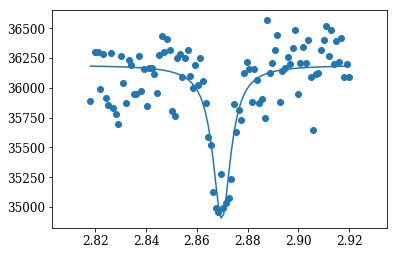

In [473]:
popt, pcov = curve_fit(lorentzian_dip, frequencies, counts, p0=[2.87,  0.001, 3000, 133000])
plt.scatter(frequencies, counts)
plt.plot(frequencies, lorentzian_dip(frequencies, *popt))
names = ['centre', 'FWHM', 'height', 'amplitude']
for x, y in zip(names, popt):
    print('{:<11}'.format(x),'=', y)
    
print('Contrast    = ', popt[3]/popt[2])

In [474]:
'''
counts = [0] * len(frequencies)
number_of_runs = 2
integration_time = 2
counter_frequency = 1/integration_time
sleep_time = 4.5
'''


counts0= np.array([19035.600000000002, 19110.8, 18991.600000000002, 18905.2, 18993.2, 19077.2, 18991.600000000002, 18995.600000000002, 19065.2, 19034.2, 19154.2, 19096.2, 19106.2, 19000.2, 19152.600000000002, 19066.4, 18902.600000000002, 18947.8, 19102.4, 19050.0, 18935.2, 19067.2, 19029.4, 19060.0, 19092.4, 19094.600000000002, 19106.600000000002, 18981.8, 18992.600000000002, 19046.0, 18997.4, 19125.4, 19070.2, 18998.4, 18917.4, 18952.600000000002, 19071.4, 18993.8, 19074.600000000002, 18872.600000000002, 18971.2, 19017.8, 18979.8, 19104.2, 18990.4, 18962.0, 19105.2, 19057.2, 19085.8, 18963.4, 19006.2, 18976.2, 18994.600000000002, 19118.4, 19029.0, 19108.8, 18935.2, 19052.0, 19090.2, 18957.600000000002, 18981.0, 18937.2, 18988.4, 18969.8, 18971.600000000002, 19043.8, 18894.0, 18905.600000000002, 18912.4, 18864.8, 18870.600000000002, 18779.8, 18761.4, 18793.2, 18836.4, 18845.0, 18831.4, 18731.4, 18770.2, 18921.600000000002, 18995.600000000002, 18921.4, 19040.600000000002, 19009.2, 18969.8, 19107.8, 19020.4, 18990.0, 18993.0, 19029.0, 19113.8, 19102.600000000002, 19026.2, 19012.2, 19026.4, 18986.4, 18927.8, 18954.0, 19039.0, 19026.2, 19024.0, 19003.0, 19060.2, 19128.4, 19094.4, 19161.8, 19005.0, 19128.4, 19112.0, 19009.0, 19014.2, 19089.0, 18991.2, 18996.8, 19063.600000000002, 19067.600000000002, 19006.2, 18994.4, 19049.0, 18988.4, 18949.4, 19148.8, 19076.600000000002, 18941.2, 19038.2, 18931.0, 19076.4, 19065.0, 19090.600000000002, 19019.2, 19065.2, 18924.8, 19046.600000000002, 19065.8, 19071.4, 19055.8, 19044.0, 18950.600000000002, 18948.2, 19004.600000000002, 19023.600000000002, 19045.2, 19087.8, 18933.0, 18981.4, 18948.4, 19066.4, 19021.2, 18982.4, 19036.4, 19048.600000000002])
counts1= np.array([248760.0, 248829.0, 249211.0, 249019.5, 248829.0, 248956.0, 248655.5, 249102.5, 249206.0, 248707.5, 248381.0, 248952.5, 248958.5, 248728.0, 249391.5, 249358.5, 248951.5, 249155.5, 249269.5, 249491.5, 248878.5, 248710.5, 248793.5, 249499.0, 249424.0, 249828.0, 249095.0, 249254.5, 249460.5, 248838.5, 248925.5, 248507.0, 248918.0, 249192.5, 248308.5, 248903.5, 248163.0, 249366.5, 249290.5, 248403.5, 248999.5, 249097.5, 249639.5, 248200.5, 249280.0, 249542.0, 248757.0, 249185.0, 248817.5, 249018.0, 248178.0, 249042.0, 248990.5, 249534.0, 249321.5, 249568.5, 248404.5, 248972.5, 248568.0, 249715.0, 248736.0, 249123.5, 249270.0, 248607.0, 248924.5, 248066.5, 247708.0, 247178.0, 247163.5, 246997.5, 245255.0, 245011.5, 245913.0, 244933.5, 245093.0, 245112.5, 245335.5, 245022.0, 244378.0, 246038.0, 246916.0, 248192.0, 247002.0, 247446.0, 247150.0, 247898.0, 248694.0, 248412.0, 247784.5, 248251.0, 248858.5, 247874.0, 248174.5, 248299.0, 248206.5, 248347.0, 248338.0, 249094.0, 249266.5, 249600.0, 249225.0, 249108.0, 248655.0, 248911.5, 248539.5, 249188.5, 249745.0, 248747.0, 249278.0, 249511.5, 248519.0, 249316.5, 248760.0, 249363.5, 249230.5, 249733.5, 249493.5, 248831.5, 249539.0, 249131.5, 249271.5, 248744.5, 249248.0, 248582.5, 249130.0, 249615.5, 248949.5, 249105.5, 248848.5, 249470.0, 249385.5, 249750.0, 249005.0, 249482.5, 249220.0, 249191.5, 249402.5, 249652.0, 249336.0, 249827.5, 249926.0, 249334.5, 249107.5, 249159.0, 248741.0, 248872.5, 249709.0, 249955.5, 249094.0, 249653.5, 249234.0])
counts = (counts0 + counts1)/2.0
frequencies = np.array([2.820676, 2.821, 2.82166443, 2.82232886, 2.82299329, 2.82365772, 2.82432215, 2.82498658, 2.82565101, 2.82631544, 2.82697987, 2.8276443, 2.82830872, 2.82897315, 2.82963758, 2.83030201, 2.83096644, 2.83163087, 2.8322953, 2.83295973, 2.83362416, 2.83428859, 2.83495302, 2.83561745, 2.83628188, 2.83694631, 2.83761074, 2.83827517, 2.8389396, 2.83960403, 2.84026846, 2.84093289, 2.84159732, 2.84226174, 2.84292617, 2.8435906, 2.84425503, 2.84491946, 2.84558389, 2.84624832, 2.84691275, 2.84757718, 2.84824161, 2.84890604, 2.84957047, 2.8502349, 2.85089933, 2.85156376, 2.85222819, 2.85289262, 2.85355705, 2.85422148, 2.85488591, 2.85555034, 2.85621477, 2.85687919, 2.85754362, 2.85820805, 2.85887248, 2.85953691, 2.86020134, 2.86086577, 2.8615302, 2.86219463, 2.86285906, 2.86352349, 2.86418792, 2.86485235, 2.86551678, 2.86618121, 2.86684564, 2.86751007, 2.8681745, 2.86883893, 2.86950336, 2.87016779, 2.87083221, 2.87149664, 2.87216107, 2.8728255, 2.87348993, 2.87415436, 2.87481879, 2.87548322, 2.87614765, 2.87681208, 2.87747651, 2.87814094, 2.87880537, 2.8794698, 2.88013423, 2.88079866, 2.88146309, 2.88212752, 2.88279195, 2.88345638, 2.88412081, 2.88478523, 2.88544966, 2.88611409, 2.88677852, 2.88744295, 2.88810738, 2.88877181, 2.88943624, 2.89010067, 2.8907651, 2.89142953, 2.89209396, 2.89275839, 2.89342282, 2.89408725, 2.89475168, 2.89541611, 2.89608054, 2.89674497, 2.8974094, 2.89807383, 2.89873826, 2.89940268, 2.90006711, 2.90073154, 2.90139597, 2.9020604, 2.90272483, 2.90338926, 2.90405369, 2.90471812, 2.90538255, 2.90604698, 2.90671141, 2.90737584, 2.90804027, 2.9087047, 2.90936913, 2.91003356, 2.91069799, 2.91136242, 2.91202685, 2.91269128, 2.9133557, 2.91402013, 2.91468456, 2.91534899, 2.91601342, 2.91667785, 2.91734228, 2.91800671, 2.91867114, 2.91933557, 2.92])

centre      = 2.86999683056
FWHM        = -0.00817337421582
height      = 134130.112138
amplitude   = 2399.90788844
Contrast    =  0.0178923871022


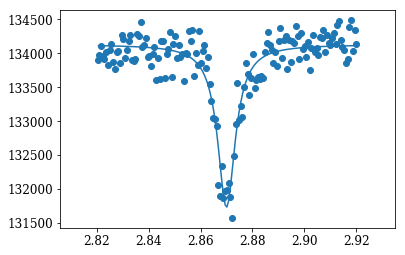

In [471]:
popt, pcov = curve_fit(lorentzian_dip, frequencies, counts, p0=[2.87,  0.001, 3000, 133000])
plt.scatter(frequencies, counts)
plt.plot(frequencies, lorentzian_dip(frequencies, *popt))
names = ['centre', 'FWHM', 'height', 'amplitude']
for x, y in zip(names, popt):
    print('{:<11}'.format(x),'=', y)
    
print('Contrast    = ', popt[3]/popt[2])

In [430]:
df = pd.read_csv (r'C:\Users\qmapp-lab\Lyra\Q data\TRACE4.csv', skiprows=17, header = None)

In [431]:
df = df.drop(df.index[-1])

In [432]:
all_frequencies = df[0].values
all_trace = df[1].values

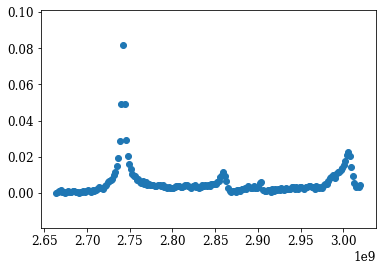

In [433]:
plt.scatter(all_frequencies, all_trace)

In [437]:
frequencies = all_frequencies[30:70]
trace = all_trace[30:70]

In [438]:
frequencies = frequencies.astype(np.float)
trace = trace.astype(np.float)

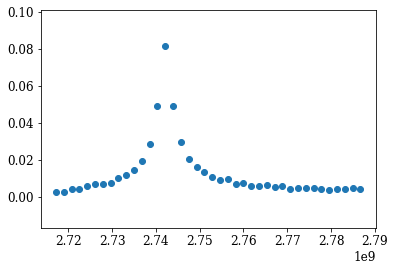

In [439]:
plt.scatter(frequencies, trace)

In [440]:
frequencies

array([  2.71720100e+09,   2.71898288e+09,   2.72076476e+09,
         2.72254664e+09,   2.72432852e+09,   2.72611040e+09,
         2.72789228e+09,   2.72967416e+09,   2.73145604e+09,
         2.73323793e+09,   2.73501981e+09,   2.73680169e+09,
         2.73858357e+09,   2.74036545e+09,   2.74214733e+09,
         2.74392921e+09,   2.74571109e+09,   2.74749297e+09,
         2.74927485e+09,   2.75105673e+09,   2.75283861e+09,
         2.75462049e+09,   2.75640237e+09,   2.75818425e+09,
         2.75996614e+09,   2.76174802e+09,   2.76352990e+09,
         2.76531178e+09,   2.76709366e+09,   2.76887554e+09,
         2.77065742e+09,   2.77243930e+09,   2.77422118e+09,
         2.77600306e+09,   2.77778494e+09,   2.77956682e+09,
         2.78134870e+09,   2.78313058e+09,   2.78491246e+09,
         2.78669435e+09])

In [441]:
trace

array([ 0.00252917,  0.00238362,  0.00408641,  0.0042307 ,  0.00599324,
        0.00679695,  0.00703337,  0.00766315,  0.01019539,  0.01175023,
        0.01466965,  0.01962134,  0.02865628,  0.04922595,  0.08172939,
        0.04923817,  0.02954552,  0.02026868,  0.01595165,  0.01325913,
        0.01056916,  0.0092217 ,  0.00952587,  0.00694815,  0.00769025,
        0.00610238,  0.00572714,  0.00656066,  0.00512137,  0.00582593,
        0.0044309 ,  0.00477932,  0.00454497,  0.00470653,  0.00438114,
        0.00385186,  0.00411727,  0.00444951,  0.00466622,  0.00404375])

[  2.74292227e+09   1.11966740e+01   8.91582367e-03   1.44649532e+09]


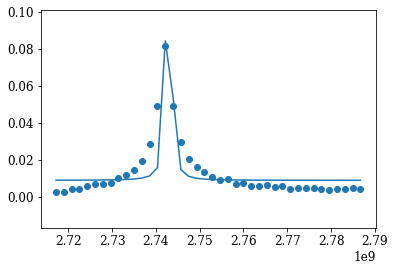

In [445]:
popt, pcov = curve_fit(lorentzian, frequencies, trace, p0=[ 2743000000, 10, 0, 10000000000])
print(popt)
p1=[ 2720000000, 10, 0, 10000000000]
plt.scatter(frequencies, trace)
plt.plot(frequencies, lorentzian(frequencies, *popt))

In [341]:
xdata = np.arange(2.6,2.8,0.00001)

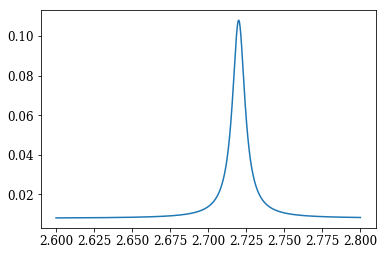

In [342]:
p0=[ 2.72, 0.01, 0.00798432, 0.1]
plt.plot(xdata, lorentzian(xdata, *p0))